In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import calendar
import numpy as np

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",index_col="date")
df.index = pd.to_datetime(df.index)

# Clean data
df = df[(df["value"]>=df["value"].quantile(0.025))&(df["value"]<=df["value"].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(data=df, x="date", y="value",c="r").set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    months = ["January", "February", "March", "April", "May","June", "July", "August",
              "September", "October", "November", "December"]
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month
    df_bar["month"] = df_bar["month"].apply(lambda x: months[x-1])
    df_bar["month"]=pd.Categorical(df_bar["month"], categories=months, ordered=True)
    table = pd.pivot_table(df_bar, values="value", index="year",columns="month",
                     aggfunc=np.mean)
    
    # Draw bar plot  
    fig=table.plot(kind="bar").get_figure()
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")

#     # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.ylabel("Page Views")
    
    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(df_box,x='year',y='value').set(title="Year-wise Box Plot (Trend)")
    plt.xlabel("Year")
    plt.ylabel("Page Views")
    plt.subplot(1,2,2)
    sns.boxplot(df_box,x='month',y='value',order=Months).set(title="Month-wise Box Plot (Seasonality)")
    plt.xlabel("Month")
    plt.ylabel("Page Views")
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


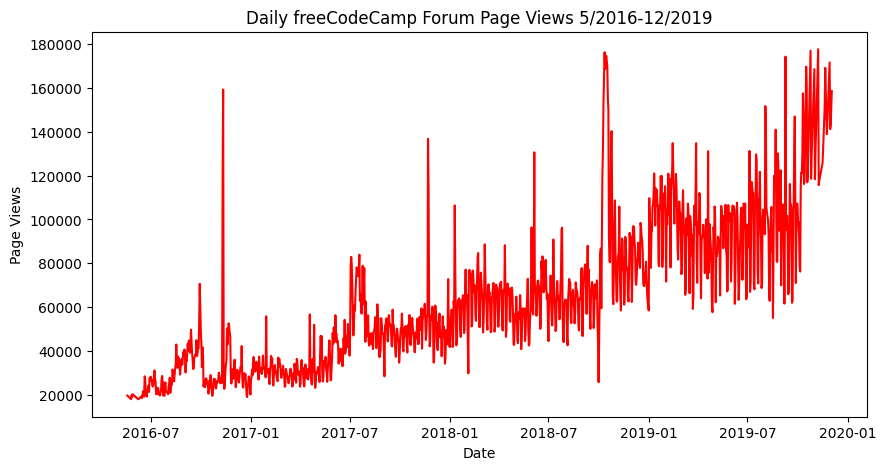

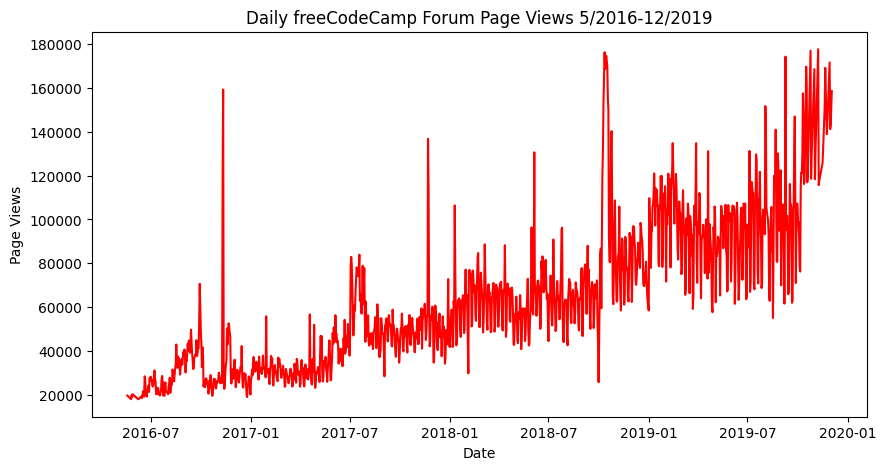

In [2]:
draw_line_plot()

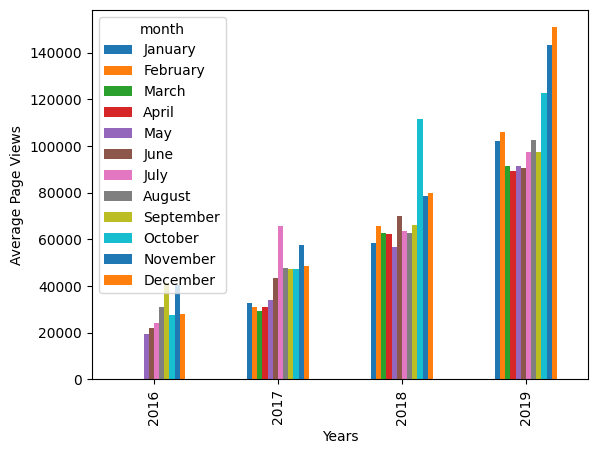

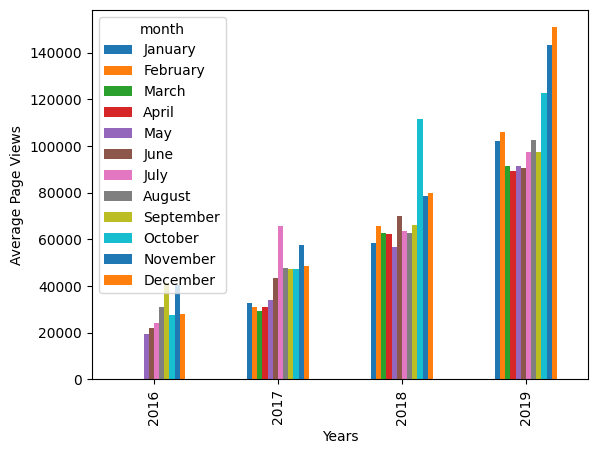

In [3]:
draw_bar_plot()

/var/folders/3y/06_xzqmx6x546h7sn8xb7r0r0000gn/T/ipykernel_32500/974905889.py:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


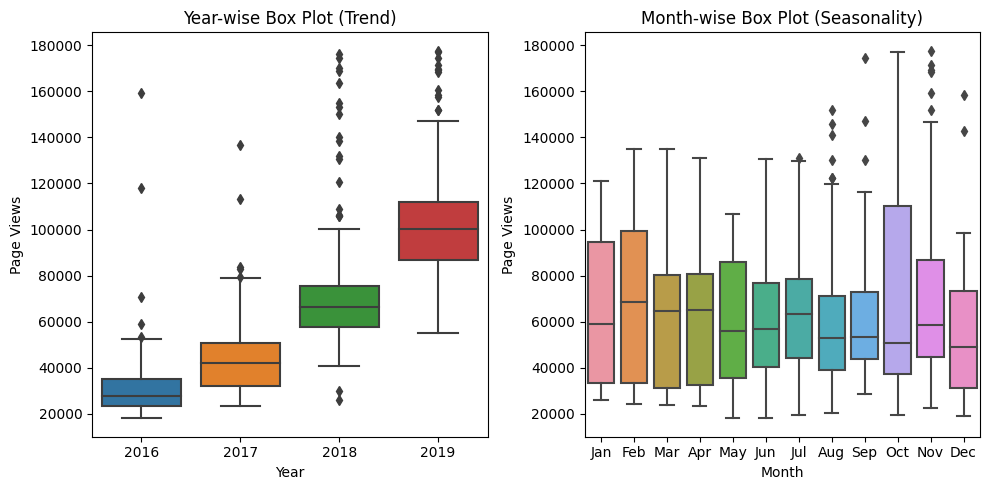

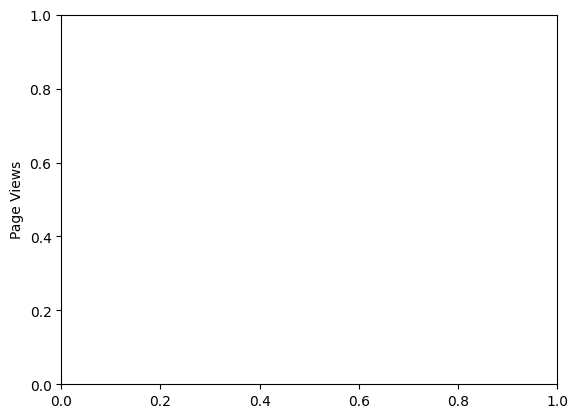

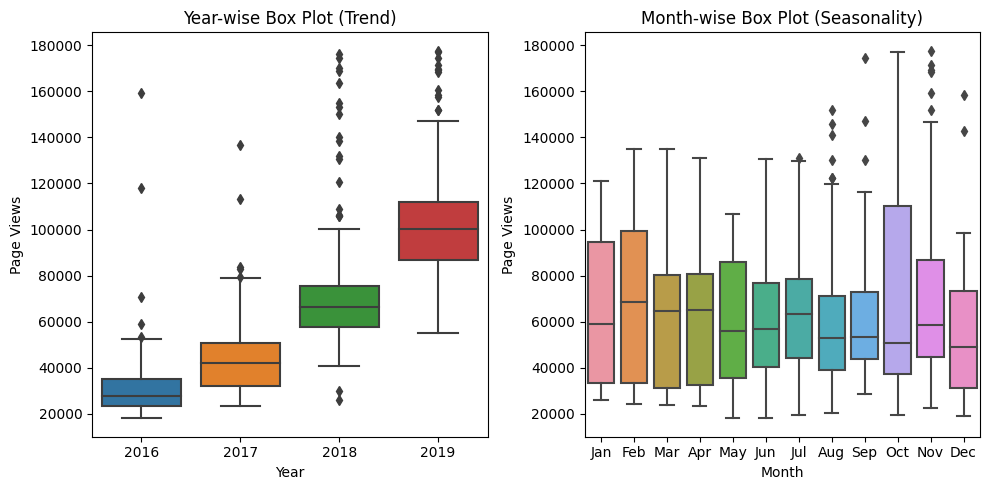

In [4]:
draw_box_plot()